<h1><center><font size="6">Keras Fundamentals</font></center></h1>

# Outline
- [Import necessary Libraries](#1)
- [Introduction](#2)
- [The fundamental building blocks in Keras](#3)
    - [Layers](#3.1)
    - [Models](#3.2)
    - [Loss function](#3.3)
    - [Optimizers](#3.4)
- [Creating neural networks in Keras](#4)
- [Conclusions](#5)
- [References](#6)

<a id='1'></a>
# Import necessary Libraries

In [1]:
# Import necessary libraries and print their versions
from platform import python_version
print(f"Python: {python_version()}")
import numpy as np
print(f"Numpy: {np.__version__}")
from tensorflow import keras
print(f"Keras: {keras.__version__}")

Python: 3.9.16
Numpy: 1.24.1
Keras: 2.10.0


<a id='2'></a>
# Introduction
TensorFlow and Keras: TensorFlow is an open source library for neural networks and deep learning developed by the Google Brain team in november 2015. Today TensorFlow and its competitor PyTorch are the most popular machine learning libraries and are used extensively in a wide variety of real-world applications. [For example](https://medium.com/airbnb-engineering/categorizing-listing-photos-at-airbnb-f9483f3ab7e3), Airbnb improves the guest experience by using TensorFlow to classify images and detect objects at scale.

Keras is a high-level API based on TensorFlow. It provides a simple and intuitive API for building neural networks with TensorFlow. Its guiding principles are modularity and extensibility. This beginner-friendly approach has led to the popularity of Keras. In this notebook we will explore the basics of Keras.

<a id='3'></a>
# The fundamentals building blocks in Keras
One of the basic building blocks in Keras are layers. We can stack these linearly to build a model. Another building block is the loss function we choose, which provides the metrics we will use to train our model using an optimizer. With these basic structures, we can build any neural network.

The following diagram illustrates the relationship between these building blocks in Keras:

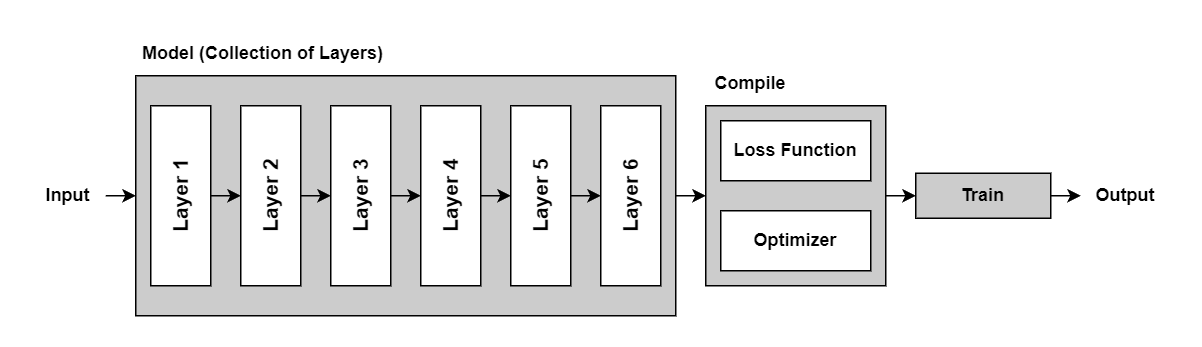

<a id='3.2'></a>
## Layers
Layers are the smallest unit of our neural network. Each layer takes an input, performs a mathematical function and then outputs it to the next layer. The most important layers in Keras include dense layers, activation layers and dropout layers. However, there are also other, more complex layers such as convolutional layers and pooling layers.

Let us first take a closer look at the dense layer. This type of layer is by far the most common type of layer used in Keras. A dense layer is also known as a fully connected layer because it uses all of its input for the mathematical function it implements. **Dense** implements the operation: **output = activation(dot(input,kernel) + bias)** where **activation** is the element-wise activation function passed as the **activation** argument, **kernel** is a weight matrix created by the layer, and **bias** is a bias vector created by the layer (only applicable if **use_bias** is **True**). These are all attributes of **Dense**.

<a id='3.2'></a>
## Models
A model is a collection of layers, and the most commonly used model in Keras is the **Sequential** model. A **Sequential** model allows us to stack layers linearly on top of each other, where a single layer is only connected to another layer. In this way, we can easily design model architectures without worrying about the underlying mathematics. This is very practical, because you have to think a lot about making sure that the successive layer dimensions are compatible with each other.

Once we have defined our model architecture, we need to define our training process, which is done with the **.compile** statement. The **compile** method takes several arguments, but the most important arguments we need to define are the **optimizer** and the **loss** function.

<a id='3.3'></a>
## Loss function
There are several loss functions implemented in Keras, but the most commonly used loss functions are: **mean_squared_error**, **categorical_crossentropy**, and **binary_crossentropy**.
As a general rule, this is how you should choose which loss function to use:
- **mean_squared_error** if the problem is a regression problem
- **categorical_crossentropy** if the problem is a multiclass classification problem
- **binary_crossentropy** if the problem is a binary classification problem

In certain cases, you might find that the default loss functions in Keras are unsuitable for your problem. In this case, you can define your own loss function by defining a custom function in Python and then passing it to the **compile** statement in Keras.

<a id='3.4'></a>
## Optimizers
An optimizer is an algorithm for updating the weights of the neural network in the training process to minimize the loss function. The loss function acts as a guide telling the optimizer if its moving in the right direction to reach the global minimum.

In this notebook we will only discuss some of the most popular optimizers in Keras. Others can be found [here](https://keras.io/api/optimizers/).
- SGD: Stochastic gradient descent (SGD) is the standard optimiser for Keras. SGD differs from regular gradient descent in the way it calculates the gradient. Instead of using all the training data to calculate the gradient per epoch, a randomly selected instance from the training data is used to estimate the gradient. This generally leads to faster convergence, but the steps are noisier because each step is an estimate. In general, researchers have found that the **sgd** optimiser works best for flat neural networks.
- Adagrad: Adagrad is the abbreviation for adaptive gradients. Essentially, what happens here is this: If a weight has experienced very large updates, its cache value will also increase. As a result, the learning rate will decrease and the update sizes of this weight will decrease over time. On the other hand, if a weight has not experienced significant updates, its cache value will be very low and therefore its learning rate will increase, forcing it to make larger updates. This is the basic principle of the **adagrad** optimiser. However, the disadvantage of this algorithm is that regardless of the past gradients of a weight, the cache will always increase by a certain amount because the square cannot be negative. Therefore, the learning rate of each weight will eventually decrease to a very low value until training no longer occurs significantly.
- RMSProp: Root Mean Squared Propagation (RMSProp) solves the problem of the previous optimiser by introducing a new parameter, the decay rate. This ensures that the learning rate is constantly changing depending on how the weighting is updated, just like **adagrad**, but at the same time the learning rate does not decrease too quickly so that training can continue for much longer.
- Adam: Adaptive Moment Estimation (Adam) is widely regarded as one of the best optimisers for Deep Learning in general. **Adam** is a combination of **RMSProp** and Momentum. Here we perform gradient accumulation by computing Momentum, and we also constantly change the learning rate by using Cache. Because of these two properties, **Adam** usually performs better than all other optimisers and is usually preferred when training a neural network.


<a id='4'></a>
## Creating neural networks in Keras
Let's look at how we can create a neural network with two layers in Keras. To create a linear collection of layers, first declare a **sequential** model in Keras:

In [2]:
model = keras.models.Sequential()

This creates an empty **Sequential** model to which we can now add layers. We start by adding layers from the left (the layer closest to the input):

In [3]:
# Layer 1
model.add(keras.layers.Dense(units=4, activation="sigmoid", input_dim=3))
# Layer 2 (Output Layer)
model.add(keras.layers.Dense(units=1, activation="sigmoid"))

With the instruction **model.add()** in Keras we can stack layers on top of each other. At the beginning we had to define the number of units in each layer. In general, a higher number of units increases the complexity of the model, as this means that more weights have to be trained. We also had to define the input for the first layer with **input_dim**. This informs Keras about the number of features (number of columns in our dataset) that our data has.

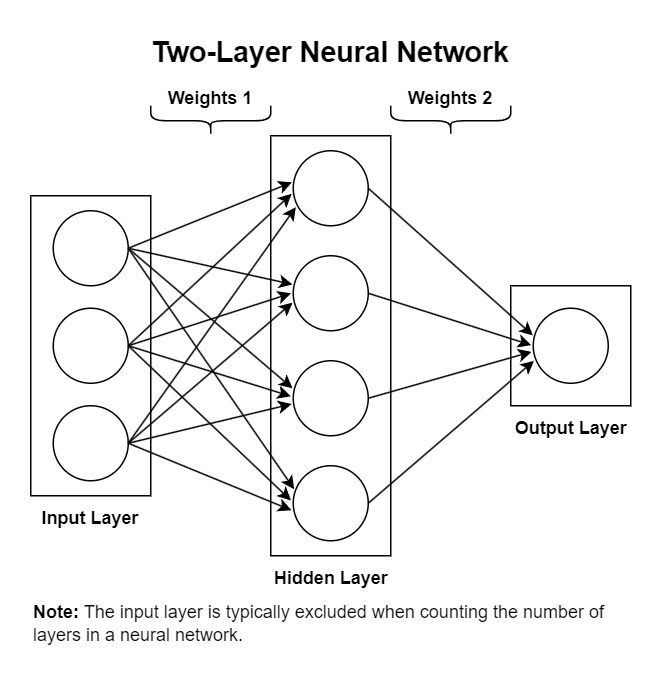

We can check the structure of our model by calling the function **model.summary()** :

In [4]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 16        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________
None


The number of parameters is the number of weights and biases we need to train for the model we just defined.

Once we have finished building the architecture of our model, we can compile it and start the training process:

In [5]:
sgd = keras.optimizers.SGD(learning_rate=1)
model.compile(optimizer=sgd, loss="mean_squared_error")

Note: We have set the learning rate of the **sgd** optimiser to 1.0. In general, the learning rate is a hyperparameter of the neutral network that needs to be set carefully depending on the problem.

Let us now create some data with which we can train our neural network. Define an **X** and **y** numpy array corresponding to the features and the target variables respectively:

In [6]:
# Setting a random seed for reproducibility
np.random.seed(42)
# Feature variables
X = np.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
# Target variables
y = np.array([[0], [1], [1], [0]])

In [7]:
# Let's train our model for 1500 iterations (epochs)
model.fit(X, y, epochs=1500, verbose=False)

In [8]:
# Get the predictions
model.predict(X)

1/1 [==============================] - 0s 71ms/step


array([[0.0567945 ],
       [0.94023657],
       [0.94039214],
       [0.05710956]], dtype=float32)

Success! We have successfully created and trained a neural network with Keras. We can verify this with our predictions, which converge with the true values.

Note: There is a slight difference between the predictions and the true values. This is desirable as it prevents overfitting and allows the neural network to generalise better to unseen data.

<a id='5'></a>
# Conclusions
In this notebook we have programmed our own little neural network with Keras and got a feel for how Keras and its building blocks work. We also took a look at different optimisers and learned what makes them stand out. From now on, we can take our deep learning projects to the next level and solve real-world problems.

<a id='6'></a>
# References
1. [Numpy](https://numpy.org/doc/1.21/)
2. [Keras](https://keras.io/api/)
3. [Diagrams](https://www.diagrams.net/)
4. [An overview of gradient descent optimization algorithms](https://arxiv.org/abs/1609.04747)
5. [Understanding Optimizers](https://medium.com/deep-learning-demystified/https-medium-com-deep-learning-demystified-understanding-optimizers-313b787a69fe)